Coefficients:
Square footage (GrLivArea): 104.03
Number of bedrooms (BedroomAbvGr): -26655.17
Number of bathrooms (FullBath): 30014.32
Intercept: 52261.75
Root Mean Squared Error (RMSE): 52975.72


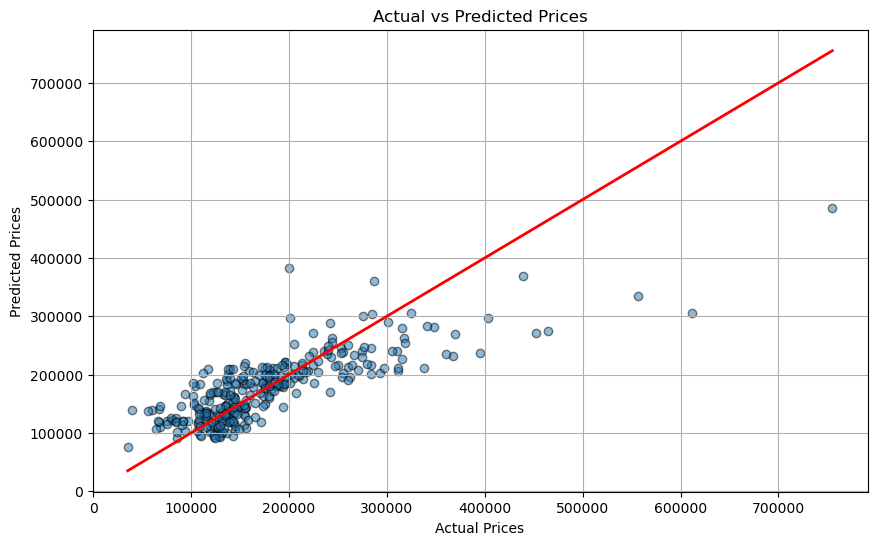

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

file_path = 'train.csv'  
data = pd.read_csv(file_path)

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

data = data[features + [target]].dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Coefficients:")
print(f"Square footage (GrLivArea): {model.coef_[0]:.2f}")
print(f"Number of bedrooms (BedroomAbvGr): {model.coef_[1]:.2f}")
print(f"Number of bathrooms (FullBath): {model.coef_[2]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()
